In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1):
    fig, ax = plt.subplots(rows, columns)
    ax.plot(x, y_true, '.', c='black', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting', linewidth=4)
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("Cluster {0}: {1} errors loss".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/15attempts/indices/index13.pickle")
train_idx = train_idx[2] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts50 = np.arange(50)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("../../Figs/curve_fitting/")

print("1:", np.shape(cluster1))
print("2:", np.shape(cluster2))
print("3:", np.shape(cluster3))
print("4:", np.shape(cluster4))
print("5:", np.shape(cluster5))
print("6:", np.shape(cluster6))
print("7:", np.shape(cluster7))
print("8:", np.shape(cluster8))
print("9:", np.shape(cluster9))
print("10:", np.shape(cluster10))
print("11:", np.shape(cluster11))
print("12:", np.shape(cluster12))
print("13:", np.shape(cluster13))

Training data set: (300, 22832)
../../Figs/curve_fitting/ already present - Skipping pickling.
1: (300, 2045)
2: (300, 1709)
3: (300, 1354)
4: (300, 1894)
5: (300, 1930)
6: (300, 2093)
7: (300, 1187)
8: (300, 1988)
9: (300, 1678)
10: (300, 1403)
11: (300, 2489)
12: (300, 1802)
13: (300, 1260)


cluster 1:
 - Curve Fitting Parameters: [ 2.22143273]
 - Curve Fitting Cost: 5.210973677900972



IndexError: index 1 is out of bounds for axis 0 with size 1

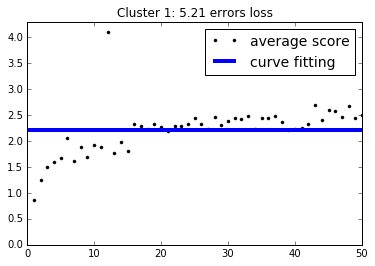

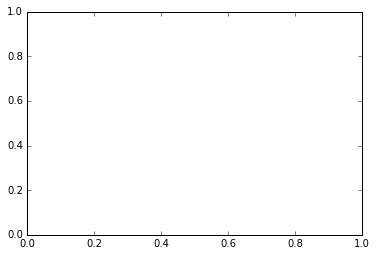

In [2]:
dcp.make_folders("../../Figs/curve_fitting/step/")

seed = [1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    pl2_opt, pl2_cost = cv.curve_Fitting(
        cv.step_least, cv.step_curve, 
        attempts50, eval("avg{0}".format(i+1))[:50], seed,
        "../../Figs/curve_fitting/step/sample{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.powerlaw_least2, cv.powerlaw_curve2, 
        attempts300, eval("avg{0}".format(i+1)), seed,
        "../../Figs/curve_fitting/step/dummy", clt_num = i+1)
    
    y_fit_valid = cv.step_least(attempts300, pl2_opt)
    y_fit_true = cv.step_least(attempts300, true_opt)
    
    pl2_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    pl2_cost_ture = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/step/valid{0}".format(i+1), 
              clt_num=i+1, cost = pl2_cost_valid)

    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
              file_path="../../Figs/curve_fitting/step/true{0}".format(i+1), 
              clt_num=i+1, cost = pl2_cost_ture)

In [ ]:
idx_matrix, err_matrix, len_matrix = cv.curve_Matrix(avg8, step_least, seed=[1], window=50, piece=3)
print(idx_matrix)
print(len_matrix)

cost, min_length, min_indice = cv.multCurve_Fitting(avg8, step_least, s=[1], w=50, p=3)

In [ ]:
x1 = np.linspace(1, 200, 200)
x2 = np.linspace(201, 250, 50)
x3 = np.linspace(251, 300, 50)

y1 = least_squares(step_least, seed, args=(x1, y))

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/step/single/")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    ## train
    exp2_opt, exp2_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed, 
        "../../Figs/curve_fitting/step/single/sample{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts300, eval("avg{0}".format(i+1)), seed, 
        "../../Figs/curve_fitting/step/single/dummy", clt_num = i+1)
    
    ## validation
    y_fit_valid = cv.exponential_curve2(attempts300, exp2_opt[0], exp2_opt[1])
    y_fit_true = cv.exponential_curve2(attempts300, true_opt[0], true_opt[1])
    
    exp2_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    exp2_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/step/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = exp2_cost_valid)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
          file_path="../../Figs/curve_fitting/step/single/true{0}".format(i+1), 
          clt_num=i+1, cost = exp2_cost_true)